# Investment Analysis Assignment

In [13]:
# import libraries and reading the data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn theme if you prefer
sns.set(style="white")
pd.options.display.float_format = '{:.0f}'.format

# get data into dataframe.
df_companies = pd.read_csv('./companies.txt', sep="\t", encoding = "ISO-8859-1")
df_rounds2 = pd.read_csv('./rounds2.csv', encoding = "ISO-8859-1")
df_mapping = pd.read_csv('./mapping.csv', encoding = "ISO-8859-1")

In [14]:
# company dataframe info and top 10 records.
df_companies.info()
df_companies.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
5,/Organization/01Games-Technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
6,/Organization/0Ndine-Biomedical-Inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
7,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
8,/Organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011
9,/Organization/1-2-3-Listo,"1,2,3 Listo",http://www.123listo.com,E-Commerce,operating,CHL,12,Santiago,Las Condes,01-01-2012


In [15]:
# df_rounds2 information and top 10 records.
df_rounds2.info()
df_rounds2.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,5/1/15,10000000
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,1/3/14,700000
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,nan
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,1/7/14,41250
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11/9/09,43360
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491
9,/ORGANIZATION/0XDATA,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000


In [563]:
# get unique companies in df_rounds2
unique_companies_rounds2 = len(df_rounds2['company_permalink'].unique().tolist())
print("Unique companies in round2: " , unique_companies_rounds2)

Unique companies in round2:  90247


In [636]:
# get unique companies in df_companies
unique_companies = len(df_companies['permalink'].unique().tolist())
print("Unique companies: " , unique_companies)

Unique companies:  66368


#### Dataframe Records

In [144]:
df_rounds2.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,5/1/15,10000000
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,1/3/14,700000
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000
5,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,nan
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,1/7/14,41250
7,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,NaN,11/9/09,43360
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491
9,/ORGANIZATION/0XDATA,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,22-05-2013,3000000


In [566]:
df_companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [19]:
# convert permalink values to lower case - needed for merge.
df_companies.permalink = df_companies.permalink.astype(str).str.lower()

In [86]:
df_companies.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43000 entries, 1 to 66366
Data columns (total 11 columns):
permalink         43000 non-null object
name              43000 non-null object
homepage_url      43000 non-null object
category_list     43000 non-null object
status            43000 non-null object
country_code      43000 non-null object
state_code        43000 non-null object
region            43000 non-null object
city              43000 non-null object
founded_at        43000 non-null object
primary_sector    43000 non-null object
dtypes: object(11)
memory usage: 3.9+ MB


In [569]:
### Clean rounds2 dataframe and lower the company_permalink column values.

In [17]:
# convert company_permalink values to lower case - needed for merge.
df_rounds2.company_permalink = df_rounds2.company_permalink.astype(str).str.lower()

In [88]:
df_rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [21]:
# Number of companies difference between to dataframes.
diff = (set(df_rounds2.company_permalink) - set(df_companies.permalink))
print('# of companies present in rounds2 but not in companies: ', len(diff))

# of companies present in rounds2 but not in companies:  7


In [573]:
### Clean Data - Clear NaN Values.

In [87]:
# clean all null records.
df_companies = df_companies.dropna(how='any',axis=0)
df_companies.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43000 entries, 1 to 66366
Data columns (total 11 columns):
permalink         43000 non-null object
name              43000 non-null object
homepage_url      43000 non-null object
category_list     43000 non-null object
status            43000 non-null object
country_code      43000 non-null object
state_code        43000 non-null object
region            43000 non-null object
city              43000 non-null object
founded_at        43000 non-null object
primary_sector    43000 non-null object
dtypes: object(11)
memory usage: 3.9+ MB


In [89]:
# df_rounds2 = df_rounds2.dropna(subset=['raised_amount_usd','funding_round_type','company_permalink'])
df_rounds2 = df_rounds2.dropna(how='any',axis=0)
df_rounds2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28169 entries, 0 to 114941
Data columns (total 6 columns):
company_permalink          28169 non-null object
funding_round_permalink    28169 non-null object
funding_round_type         28169 non-null object
funding_round_code         28169 non-null object
funded_at                  28169 non-null object
raised_amount_usd          28169 non-null float64
dtypes: float64(1), object(5)
memory usage: 1.5+ MB


#### Merge Round2 and Company Data frames.

In [576]:
#### Merge on 'permalink'

In [23]:
master_frame = df_rounds2.merge(df_companies, left_on='company_permalink', right_on='permalink')
master_frame.info()
master_frame = master_frame.dropna(subset=['raised_amount_usd'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83687 entries, 0 to 83686
Data columns (total 16 columns):
company_permalink          83687 non-null object
funding_round_permalink    83687 non-null object
funding_round_type         83687 non-null object
funding_round_code         23967 non-null object
funded_at                  83687 non-null object
raised_amount_usd          71580 non-null float64
permalink                  83687 non-null object
name                       83687 non-null object
homepage_url               83687 non-null object
category_list              83687 non-null object
status                     83687 non-null object
country_code               83687 non-null object
state_code                 83687 non-null object
region                     83687 non-null object
city                       83687 non-null object
founded_at                 83687 non-null object
dtypes: float64(1), object(15)
memory usage: 10.9+ MB


In [24]:
### verify ther is no null entries present on master_frame.raised_amount_usd column

In [25]:
master_frame.raised_amount_usd.isna().sum()

0

In [145]:
### Average Funding by Type.

In [94]:
funding_types = master_frame.groupby('funding_round_type')
funding_types['raised_amount_usd'].mean().sort_values(ascending = False)
# funding_types['raised_amount_usd'].median().sort_values(ascending = False)

funding_round_type
post_ipo_debt           148136625
private_equity           73296692
post_ipo_equity          69864255
secondary_market         64211140
debt_financing           17312848
undisclosed              14632058
venture                  12124394
grant                     4549668
convertible_note          1321638
product_crowdfunding      1233356
angel                      932646
seed                       759309
equity_crowdfunding        537113
non_equity_assistance      241300
Name: raised_amount_usd, dtype: float64

In [27]:
country_wise_funding = master_frame.groupby(['funding_round_type','country_code'])
country_wise_funding['raised_amount_usd'].count()

funding_round_type  country_code
angel               ARE                 9
                    ARG                25
                    AUS                57
                    AUT                22
                    BEL                21
                    BGD                 3
                    BGR                 5
                    BHR                 1
                    BMU                 1
                    BRA                53
                    CAN               133
                    CHE                37
                    CHL                16
                    CHN                63
                    COL                 4
                    CYM                 1
                    CYP                 4
                    CZE                 5
                    DEU                63
                    DMA                 1
                    DNK                38
                    DOM                 1
                    EGY                 2
 

In [95]:
# Top 9 Countries of funding type 'venture'
venture_data =  master_frame.loc[(master_frame['funding_round_type'] == 'venture'),:]
contry_wise_venture_data = venture_data.groupby('country_code')['raised_amount_usd'].sum()
top9 = pd.DataFrame(contry_wise_venture_data.sort_values(ascending = False).head(9))
top9

,raised_amount_usd
country_code,
USA,350573419272
CHN,28392791766
GBR,14354877384
IND,12701077848
CAN,7380624894
ISR,5904596268
DEU,5289190364
FRA,5021597879
SWE,2637514240


In [29]:
# mapping information.
df_mapping.info()
df_mapping.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.8+ KB


,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


In [146]:
# function to get primary sector from ca
def getPrimarySector(category_list):
    category_list = str(category_list)
    return category_list[0: category_list.find('|')] if (category_list.find('|') > 0) else category_list 


In [147]:
# Create a new column 'primary_sector' and drop NA values.
company_primary_sector = df_companies
company_primary_sector['primary_sector'] = company_primary_sector['category_list'].apply(getPrimarySector)
company_primary_sector = company_primary_sector.drop(columns=['category_list'], axis=1)
company_primary_sector.primary_sector = company_primary_sector.primary_sector.astype(str).str.lower()

# convert category_list values to lowercase.
category_mapping = df_mapping;
category_mapping.category_list = category_mapping.category_list.astype(str).str.lower()

# merge dataframes.
company_category_mapping = pd.merge(company_primary_sector, category_mapping,  how='inner', left_on=['primary_sector'], right_on=['category_list'], suffixes=('', '_y'))
company_category_mapping.reset_index()
company_category_mapping.permalink = company_category_mapping.permalink.astype(str).str.lower()
company_category_mapping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62039 entries, 0 to 62038
Data columns (total 20 columns):
permalink                                  62039 non-null object
name                                       62038 non-null object
homepage_url                               57192 non-null object
status                                     62039 non-null object
country_code                               55394 non-null object
state_code                                 53915 non-null object
region                                     54371 non-null object
city                                       54373 non-null object
founded_at                                 47535 non-null object
primary_sector                             62039 non-null object
category_list                              62039 non-null object
Automotive & Sports                        62039 non-null int64
Blanks                                     62039 non-null int64
Cleantech / Semiconductors                 62039

In [97]:
# define Aggregate function to get total investment and No_of_Investments.
def investment_agg(record):
        names = {
            'total_investment': record['raised_amount_usd'].sum(),
            'no_of_investment': int(record['raised_amount_usd'].count())}
        return pd.Series(names, index=['total_investment', 'no_of_investment'])

# get all data of funding type ='venture'
venture_data = master_frame.loc[master_frame['funding_round_type'] == 'venture', :] #master_frame[master_frame['funding_round_type'] == 'venture']

# get country wise total investment and count.
country_Data = venture_data.groupby('country_code').apply(investment_agg)
country_Data.sort_values(['total_investment', 'no_of_investment'], ascending=[False, False]).head()
top9_country_Data = country_Data.sort_values(['total_investment', 'no_of_investment'], ascending=[False, False]).head(9)
top9_country_Data

,total_investment,no_of_investment
country_code,,
USA,350573419272,29279
CHN,28392791766,855
GBR,14354877384,1429
IND,12701077848,691
CAN,7380624894,920
ISR,5904596268,636
DEU,5289190364,403
FRA,5021597879,644
SWE,2637514240,190


In [98]:

# get contry wise data for top threee country.
USA_data = venture_data.loc[venture_data['country_code'] == 'USA', :]
GBR_data = venture_data.loc[venture_data['country_code'] == 'GBR', :]
IND_data = venture_data.loc[venture_data['country_code'] == 'IND', :]


# get merged dataframe with country data and company_category_mapping.
d1 = pd.merge(USA_data, company_category_mapping,  how='inner', on='permalink', suffixes=('', '_y'))
d2 = pd.merge(GBR_data, company_category_mapping,  how='inner', on='permalink', suffixes=('', '_y'))
d3 = pd.merge(IND_data, company_category_mapping,  how='inner', on='permalink', suffixes=('', '_y'))

# get total investment and count of top 3 primary sector.
sector_wise_USA_data = d1.groupby('primary_sector').apply(investment_agg)
sector_wise_GBR_data = d2.groupby('primary_sector').apply(investment_agg)
sector_wise_IND_data = d3.groupby('primary_sector').apply(investment_agg)
# top 3 sectors in USA.
sector_wise_USA_data.sort_values([ 'no_of_investment'], ascending=[False]).head(3)

,total_investment,no_of_investment
primary_sector,,
biotechnology,52016198782,4054
software,17940074183,2441
advertising,16442363318,1644


In [99]:
# top 3 sectors in GBR.
sector_wise_GBR_data.sort_values(['no_of_investment'], ascending=[False]).head(3)

,total_investment,no_of_investment
primary_sector,,
software,899236070,150
biotechnology,2256814503,145
advertising,682164869,93


In [100]:
# top 3 sectors in IND.
sector_wise_IND_data.sort_values(['no_of_investment'], ascending=[ False]).head(3)

,total_investment,no_of_investment
primary_sector,,
e-commerce,3991779598,91
software,514171756,40
curated web,529768770,29


In [35]:
# Top funding company in top primary sector of USA.
sector_wise_USA_data = d1.loc[d1.primary_sector == 'biotechnology', :]
sector_wise_USA_data.sort_values(['raised_amount_usd'], ascending=[False]).head(1)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,...,category_list_y,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
12466,/organization/juno-therapeutics,/funding-round/f93ba64f2e858105c47ee4901dc71d74,venture,NaN,14-07-2015,849803496,/organization/juno-therapeutics,Juno Therapeutics,http://junotherapeutics.com,Biotechnology|Health and Wellness|Health Care,...,biotechnology,0,0,1,0,0,0,0,0,0


In [36]:
# Top funding company in second top primary sector of USA.
sector_wise_USA_data = d1.loc[d1.primary_sector == 'software', :]
sector_wise_USA_data.sort_values(['raised_amount_usd'], ascending=[False]).head(1)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,...,category_list_y,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
22939,/organization/surveymonkey,/funding-round/b2769574c2855e34298aeeaa7a93eb9c,venture,NaN,15-12-2014,250000000,/organization/surveymonkey,SurveyMonkey,http://www.surveymonkey.com,Software|Surveys,...,software,0,0,0,0,0,0,0,1,0


In [148]:
# Top funding company in top primary sector of GBR.
top_sector_GBR_Data = d2.loc[d2.primary_sector == 'software', :]
top_sector_GBR_Data.sort_values(['raised_amount_usd'], ascending=[False]).head(1)


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,...,category_list_y,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
114,/organization/avecto,/funding-round/55fc2f58248a76d0a4fbc3165c05f299,venture,NaN,2/12/15,49000000,/organization/avecto,Avecto,http://www.avecto.com,Software,...,software,0,0,0,0,0,0,0,1,0


In [38]:
# Top funding company in second best sector of GBR.
second_best_GBR_Data = d2.loc[d2.primary_sector == 'biotechnology', :]
second_best_GBR_Data.sort_values(['raised_amount_usd'], ascending=[False]).head(1)


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,...,category_list_y,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
546,/organization/immunocore,/funding-round/6159299c71ab84032910b48ceed406cf,venture,NaN,16-07-2015,320000000,/organization/immunocore,Immunocore,http://immunocore.com,Biotechnology|Market Research,...,biotechnology,0,0,1,0,0,0,0,0,0


In [39]:
# Top funding company in top primary sector of IND.
top_sector_IND_Data = d3.loc[d3.primary_sector == 'e-commerce', :]
top_sector_IND_Data.sort_values(['raised_amount_usd'], ascending=[False]).head(1)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,...,category_list_y,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
185,/organization/flipkart,/funding-round/af6ac1c9d2f3050fd5e1530be3b9565f,venture,G,29-07-2014,1000000000,/organization/flipkart,Flipkart,http://www.flipkart.com,E-Commerce|Online Shopping,...,e-commerce,0,0,0,0,0,0,0,1,0


In [40]:
# Top funding company in second best sector of IND.
second_best_IND_Data = d3.loc[d3.primary_sector == 'software', :]
second_best_IND_Data.sort_values(['raised_amount_usd'], ascending=[False]).head(1)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,...,category_list_y,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
257,/organization/igate-patni-computers,/funding-round/c6d32837bd49cafa000b56e61b7a4f82,venture,NaN,13-09-2002,100000000,/organization/igate-patni-computers,iGATE/Patni Computers,http://www.igate.com/,Software|Technology,...,software,0,0,0,0,0,0,0,1,0


In [41]:
### Plot Graphs

In [85]:
# define Aggregate function to get total investment and No_of_Investments.
def investment_agg(record):
        names = {
            'total_investment': record['raised_amount_usd'].sum(),
            'average': record['raised_amount_usd'].mean()}
        return pd.Series(names, index=['total_investment', 'average'])
    
funding_types = master_frame.groupby('funding_round_type').apply(investment_agg)
funding_types

,total_investment,average
funding_round_type,,
angel,3731517646,932646
convertible_note,1473626619,1321638
debt_financing,91307962285,17312848
equity_crowdfunding,432913266,537113
grant,7265819111,4549668
non_equity_assistance,13030203,241300
post_ipo_debt,15850618866,148136625
post_ipo_equity,29762172542,69864255
private_equity,105400643734,73296692


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


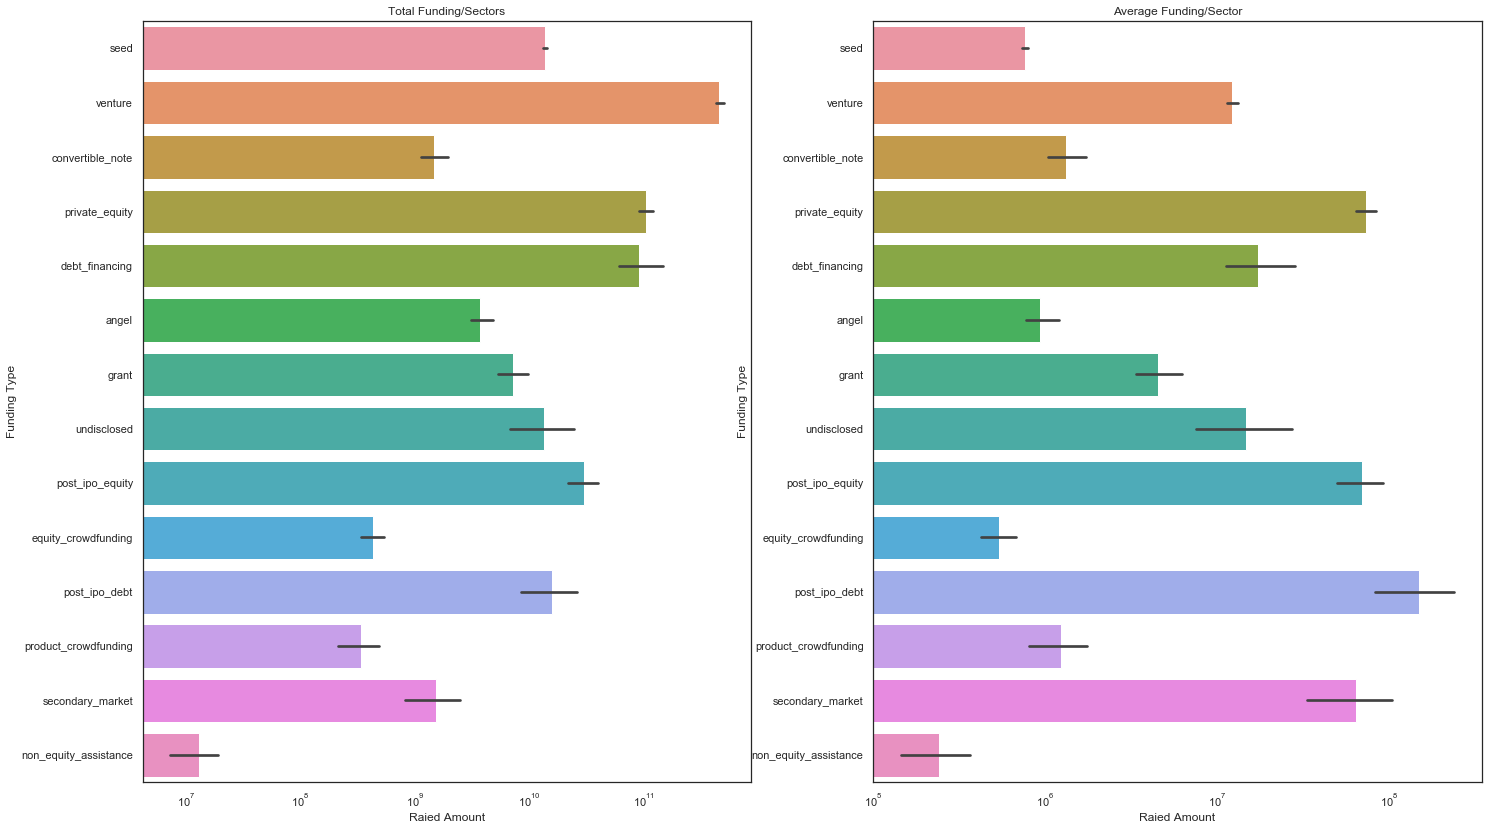

In [43]:
# Create 2 subplots for total investment and average investment by sectors.

# increase figure size 
plt.figure(figsize=(24, 14))

# subplot 1: statistic=mean
plt.subplot(1, 2, 1)
sns.barplot(x='raised_amount_usd', y='funding_round_type', data=master_frame, estimator=np.sum)
plt.xlabel('Raied Amount')
plt.ylabel('Funding Type')
plt.xscale('log')
plt.title("Total Funding/Sectors")

# subplot 2: statistic=median
plt.subplot(1, 2, 2)
sns.barplot(x='raised_amount_usd', y='funding_round_type', data=master_frame, estimator=np.mean)
plt.xlabel('Raied Amount')
plt.ylabel('Funding Type')
plt.xscale('log')
plt.title("Average Funding/Sector")

plt.show()


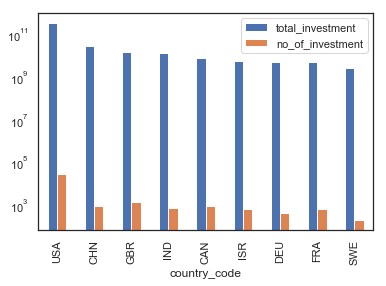

In [44]:
# bar plot with default statistic=mean
top9_country_Data.plot(kind='bar', logy=True, layout=(20,8))

In [45]:
three_country_data =pd.concat([d1, d2, d3], axis = 0)
three_country_data.dropna(how='any',axis=0)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,...,category_list_y,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,A,16-02-2011,2520000,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,...,curated web,0,0,0,0,0,0,1,0,0
6,/organization/100health,/funding-round/502f558bee350299fd1ae503e5b9a124,venture,A,20-10-2015,3530000,/organization/100health,Redox,http://www.redoxengine.com,Health Care|Health Care Information Technology...,...,health care,0,0,0,0,1,0,0,0,0
8,/organization/10x-genomics,/funding-round/563923487783bdeb5d0b7872f3d6b99a,venture,B,12/1/15,55000000,/organization/10x-genomics,10X Genomics,http://10xgenomics.com,Biotechnology|Technology,...,biotechnology,0,0,1,0,0,0,0,0,0
9,/organization/10x-technologies,/funding-round/39c1441d5098875a925577d0f2ad3904,venture,B,12/1/15,550000,/organization/10x-technologies,10X Technologies,http://10xtechnologies.com,Biotechnology,...,biotechnology,0,0,1,0,0,0,0,0,0
11,/organization/1366-technologies,/funding-round/2a31dd8a0b006b341cde0f7b721008e6,venture,B,14-01-2011,2400000,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,...,manufacturing,0,0,0,0,0,1,0,0,0
12,/organization/1366-technologies,/funding-round/31e8a281fe0247f5f13f7be8afe47e01,venture,C,12/12/13,2500000,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,...,manufacturing,0,0,0,0,0,1,0,0,0
13,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,venture,C,15-10-2013,15000000,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,...,manufacturing,0,0,0,0,0,1,0,0,0
14,/organization/1366-technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,venture,C,9/4/15,5000000,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,...,manufacturing,0,0,0,0,0,1,0,0,0
15,/organization/1366-technologies,/funding-round/786f61aa9866f4471151285f5c56be36,venture,A,3/2/10,5150000,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,...,manufacturing,0,0,0,0,0,1,0,0,0
16,/organization/1366-technologies,/funding-round/82ace97530965cd2be8f262836b43ff5,venture,A,27-03-2008,12400000,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,...,manufacturing,0,0,0,0,0,1,0,0,0


In [81]:

three_country_data = pd.concat([d1, d2, d3], axis = 0)

three_country_pivot_table = three_country_data.pivot_table(values = 'raised_amount_usd', 
                      index = 'primary_sector', 
                      columns = 'country_code', 
                      aggfunc = 'sum')
funding_in_country = three_country_data.groupby('country_code').apply(investment_agg)

In [143]:
#### Plot Country sector graph

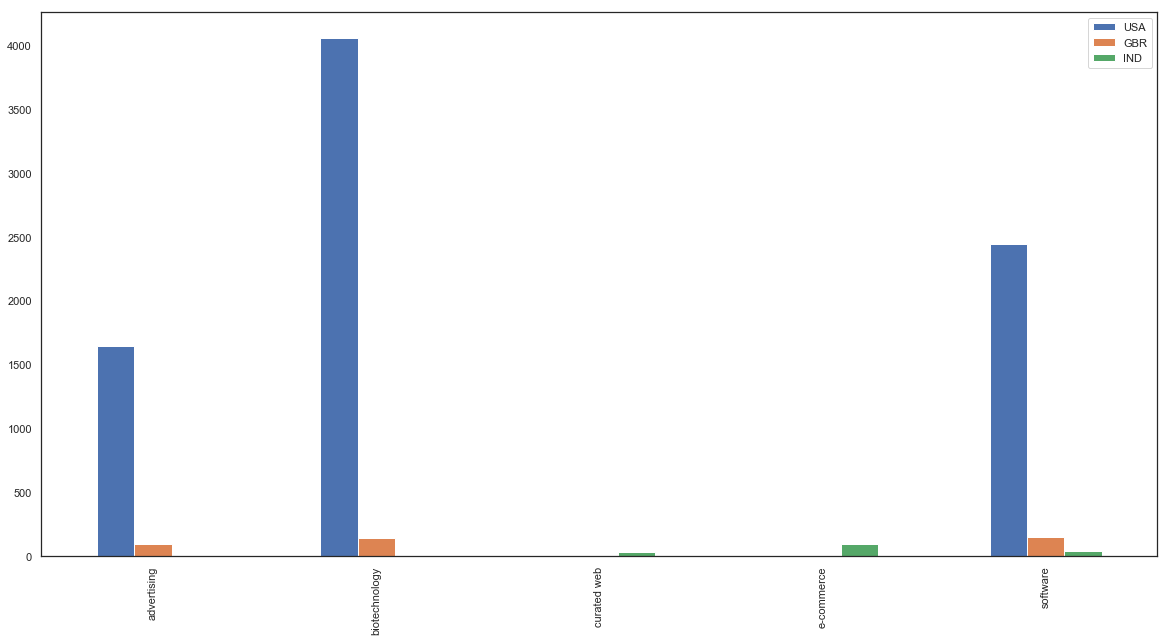

In [141]:
top3USA_Sectors['USA'] = pd.DataFrame(sector_wise_USA_data.sort_values([ 'no_of_investment'], ascending=[False]).head(3)['no_of_investment'])
top3GBR_Sectors['GBR'] = pd.DataFrame(sector_wise_GBR_data.sort_values([ 'no_of_investment'], ascending=[False]).head(3)['no_of_investment'])
top3IND_Sectors['IND'] = pd.DataFrame(sector_wise_IND_data.sort_values([ 'no_of_investment'], ascending=[False]).head(3)['no_of_investment'])

df_sector_countries = pd.concat([top3USA_Sectors,top3GBR_Sectors, top3IND_Sectors],axis=1, sort=True)
df_sector_countries.plot.bar(figsize=(20,10))